# Blood Pressure from PPG signal

In this notebook, you should solve the problem in Task 4 (blood pressure estimation from PPG signal) in the first assignment (<a href="http://kovan.ceng.metu.edu.tr/~sinan/DL/HW1.html">HW1</a>) using a CNN architecture that you should construct using the layers and the network you developed in this HW.

The notebook is intentionally composed of only this cell. You can copy-paste any text, data, cell, or code that you developed in this HW or HW1. You can add as many cells as you want. You can create files on the disk as freely as you like.

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
from metu.data_utils import load_dataset
from cs231n.classifiers.cnn import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the PPG dataset
# If your memory turns out to be sufficient, try loading a subset
def get_data(datafile, training_ratio=0.9, test_ratio=0.06, val_ratio=0.01):
  # Load the PPG training data 
  X, y = load_dataset(datafile)
    
  # TODO: Split the data into training, validation and test sets
  length=len(y)
  num_training=int(length*training_ratio)
  num_val = int(length*val_ratio)
  num_test = min((length-num_training-num_val), int(length*test_ratio))
  mask = range(num_training-1)
  X_train = X[mask]
  y_train = y[mask]
  mask = range(num_training, num_training+num_test)
  X_test = X[mask]
  y_test = y[mask]
  mask = range(num_training+num_test, num_training+num_test+num_val)
  X_val = X[mask]
  y_val = y[mask]
  
  return X_train, y_train, X_val, y_val, X_test, y_test

datafile = 'metu/dataset/part1_dataset.mat' #TODO: PATH to your data file
input_size = 1000 #2 # TODO: Size of the input of the network

X_train, y_train, X_val, y_val, X_test, y_test = get_data(datafile)
print "Number of instances in the training set: ", len(X_train)
print "Number of instances in the validation set: ", len(X_val)
print "Number of instances in the testing set: ", len(X_test)

Number of instances in the training set:  8999
Number of instances in the validation set:  100
Number of instances in the testing set:  600


In [3]:
X_train = X_train.reshape(8999, 1, 10, 100)
X_val = X_val.reshape(100, 1, 10, 100)
X_test = X_test.reshape(600, 1, 10, 100)

In [49]:
# hyper parameter arrays
best_net = None
results = {}
best_val_loss = float("inf")

epochs = 20
optimizations = ['rmsprop']#, 'momentum', 'sgd']
filter_size = [3]#, 7]
filter_numbers = [500]#, 64, 32]
batch_size = [32]#, 64, 32]
learning_rate = [1e-2]#, 9e-5, 1e-4]

In [ ]:
# default architecture experiments
for opt in optimizations:
    for fs in filter_size:
        for fn in filter_numbers:
            for bs in batch_size:
                for lr in learning_rate:
                    model = init_cnn(weight_scale=1e-3, bias_scale=0, input_shape=(1, 1, 1000), \
                                         num_classes=2, num_filters=fn, filter_size=fs)
                    best_model, train_loss_history, val_loss_history = train(X_train, y_train, X_val, y_val, \
                                                                             model, regresion_loss, update=opt, \
                                                                             reg=0.001, momentum=0.9, \
                                                                             learning_rate=lr, batch_size=bs, \
                                                                             num_epochs=epochs, acc_frequency=50, \
                                                                             verbose=True)
                    results[(opt, fs, fn, bs, lr)] = train_loss_history, val_loss_history
                    
                    val_score = regresion_loss(X_val, best_model)
                    val_loss = np.sum(np.square(val_score - y_val)) / 2
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        best_net = best_model

starting iteration  0
Finished epoch 0 / 20: train loss 321724.408694 validation loss 871240.822675
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
Finished epoch 0 / 20: train loss 21482.205601 validation loss 44103.782500
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
Finished epoch 0 / 20: train loss 10194.579374 validation loss 30393.629786
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
Finished epoch 0 / 20: train loss 7830.671990 validation loss 9071.771559
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
Finished epoch 0 / 20: train loss 7689.542611 validation loss 14242.349335
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
Finished

starting iteration  1960
Finished epoch 7 / 20: train loss 5884.135135 validation loss 2990.030663
starting iteration  1970
starting iteration  1980
starting iteration  1990
starting iteration  2000
Finished epoch 7 / 20: train loss 6456.145477 validation loss 9769.256879
starting iteration  2010
starting iteration  2020
starting iteration  2030
starting iteration  2040
starting iteration  2050
Finished epoch 7 / 20: train loss 7375.590445 validation loss 7524.348080
starting iteration  2060
starting iteration  2070
starting iteration  2080
starting iteration  2090
starting iteration  2100
Finished epoch 7 / 20: train loss 7107.900022 validation loss 5135.852657
starting iteration  2110
starting iteration  2120
starting iteration  2130
starting iteration  2140
starting iteration  2150
Finished epoch 7 / 20: train loss 14263.662191 validation loss 7141.451781
starting iteration  2160
starting iteration  2170
starting iteration  2180
starting iteration  2190
starting iteration  2200
Fini

optimization: rmsprop filter_size: 3 filter_numbers: 96 batch_size: 32 learning_rate: 0.01


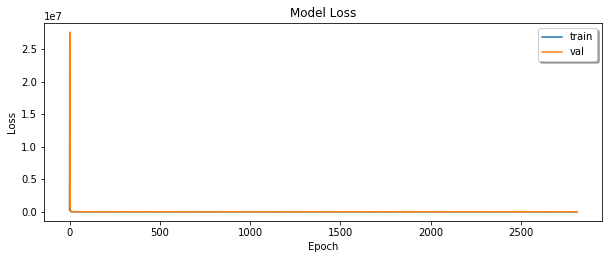

In [45]:
for opt in optimizations:
    for fs in filter_size:
        for fn in filter_numbers:
            for bs in batch_size:
                for lr in learning_rate:
                    loss_history = results[(opt, fs, fn, bs, lr)]
                    print "optimization: " + opt + " filter_size: " + str(fs) + " filter_numbers: " + str(fn) \
                          + " batch_size: " + str(bs) + " learning_rate: " + str(lr)
                    
                    plt.subplot(2, 1, 2)
                    plt.plot(results[opt, fs, fn, bs, lr][0], label='train')
                    plt.plot(results[opt, fs, fn, bs, lr][1], label='val')
                    plt.legend(loc='upper right', shadow=True)
                    plt.title('Model Loss')
                    plt.xlabel('Epoch')
                    plt.ylabel('Loss')
                    plt.show()

In [46]:
y_test_pred = regresion_loss(X_test, best_net)
threshold = np.fabs(y_test_pred - y_test) - 0.1
test_err = np.sum(np.square(np.maximum(0, threshold)), axis=1).mean()
print 'Test error: ', test_err

Test error:  669.593425237616


# Comments About Experiment
I created cnn.py file under clasifier directory. All function that are used in this notebook are in that file.
I reimplemented init, train and loss funtion that are used in previous notebook. They adepted to implement regression model. Mean squared error used for regression.